In [67]:
import polars as pl
import pandas as pd
import preprocessing.feature_engineering as fe
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler

import mplcyberpunk
plt.style.use("cyberpunk")


In [ ]:
df_selected = pl.read_parquet("./data/2022_data_selected.parquet")

In [ ]:
dict = fe.create_faildate_dict(df_selected)
df = fe.create_faildate(df_selected, dict)
df_classified = fe.create_target_classification(df)


In [ ]:
df_ST4000 = df_classified.filter((pl.col("model") == "ST4000DM000"))

In [ ]:
df_ST4000 = df_ST4000.filter(pl.col("Time_till_failure") >= pl.duration(days=1))

In [ ]:
df_ST4000 = df_ST4000.to_pandas()

In [112]:
df_ST4000.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,...,smart_194_raw,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,faildate,Time_till_failure,failing_in14days
0,2022-03-11,Z302SYB1,ST4000DM000,4000787030016,0,119.0,233213880.0,92.0,0.0,100.0,...,27.0,100.0,0.0,100.0,0.0,200.0,0.0,2022-04-18,38 days,0
1,2022-03-11,Z302B20G,ST4000DM000,4000787030016,0,118.0,195031208.0,92.0,0.0,100.0,...,22.0,100.0,0.0,100.0,0.0,200.0,0.0,2022-06-06,87 days,0
2,2022-03-11,Z304KCK9,ST4000DM000,4000787030016,0,117.0,159295632.0,91.0,0.0,100.0,...,26.0,100.0,16.0,100.0,16.0,200.0,0.0,2022-11-28,262 days,0
3,2022-03-11,Z304HVAX,ST4000DM000,4000787030016,0,117.0,132116312.0,93.0,0.0,100.0,...,27.0,100.0,0.0,100.0,0.0,200.0,0.0,2022-04-08,28 days,0
4,2022-03-11,Z305A951,ST4000DM000,4000787030016,0,107.0,12758120.0,91.0,0.0,100.0,...,22.0,100.0,8.0,100.0,8.0,200.0,23.0,2022-07-02,113 days,0


In [41]:
df_mean = df_ST4000.groupby(['Time_till_failure'])['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw', 'smart_194_raw'].mean()

/var/folders/jk/l63l0r0j0fg5z23p4tqmsl5h0000gn/T/ipykernel_14758/3634159383.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_mean = df_ST4000.groupby(['Time_till_failure'])['smart_5_raw', 'smart_187_raw', 'smart_188_raw', 'smart_197_raw', 'smart_198_raw', 'smart_194_raw'].mean()


In [ ]:
df_mean_normalized = df_ST4000.groupby(['Time_till_failure'])['smart_5_normalized', 'smart_187_normalized', 'smart_188_normalized', 'smart_197_normalized', 'smart_198_normalized', 'smart_194_normalized'].mean()

In [42]:
df_mean.head()

,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,smart_194_raw
Time_till_failure,,,,,,
1 days,1194.709677,64.038710,0.385484,334.077419,334.077419,25.175806
2 days,1045.045752,61.519608,0.348039,272.614379,272.614379,25.192810
3 days,992.326264,58.867863,0.321370,248.874388,248.874388,25.238173
4 days,1003.864734,56.249597,0.267311,209.867955,209.867955,25.304348
5 days,887.605263,56.075658,0.269737,193.934211,193.934211,25.268092


In [43]:
df_mean =df_mean.reset_index()
df_mean_normalized =df_mean_normalized.reset_index()


In [ ]:
df_mean.info()

In [44]:
df_mean['Time_till_failure'] = df_mean['Time_till_failure'].dt.days
df_mean.head()

,Time_till_failure,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,smart_194_raw
0,1,1194.709677,64.038710,0.385484,334.077419,334.077419,25.175806
1,2,1045.045752,61.519608,0.348039,272.614379,272.614379,25.192810
2,3,992.326264,58.867863,0.321370,248.874388,248.874388,25.238173
3,4,1003.864734,56.249597,0.267311,209.867955,209.867955,25.304348
4,5,887.605263,56.075658,0.269737,193.934211,193.934211,25.268092


In [46]:
df_mean_smart = df_mean.drop(['Time_till_failure'], axis=1)
df_mean_time = df_mean['Time_till_failure']


In [47]:
df_mean_smart.head()

,smart_5_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,smart_194_raw
0,1194.709677,64.038710,0.385484,334.077419,334.077419,25.175806
1,1045.045752,61.519608,0.348039,272.614379,272.614379,25.192810
2,992.326264,58.867863,0.321370,248.874388,248.874388,25.238173
3,1003.864734,56.249597,0.267311,209.867955,209.867955,25.304348
4,887.605263,56.075658,0.269737,193.934211,193.934211,25.268092


In [48]:
scaler = StandardScaler()
df_mean_smart = scaler.fit_transform(df_mean_smart)


In [53]:
df_mean_smart = pd.DataFrame(df_mean_smart)

In [54]:
df_mean = pd.concat([df_mean_time,df_mean_smart], axis=1)

In [110]:
df_mean.head()

,Time_till_failure,0,1,2,3,4,5
0,1,5.294764,3.870681,6.104451,8.348101,8.348101,-0.932170
1,2,4.405981,3.643774,5.417773,6.698493,6.698493,-0.902895
2,3,4.092905,3.404919,4.928706,6.061334,6.061334,-0.824796
3,4,4.161427,3.169079,3.937336,5.014440,5.014440,-0.710866
4,5,3.471017,3.153411,3.981827,4.586794,4.586794,-0.773286


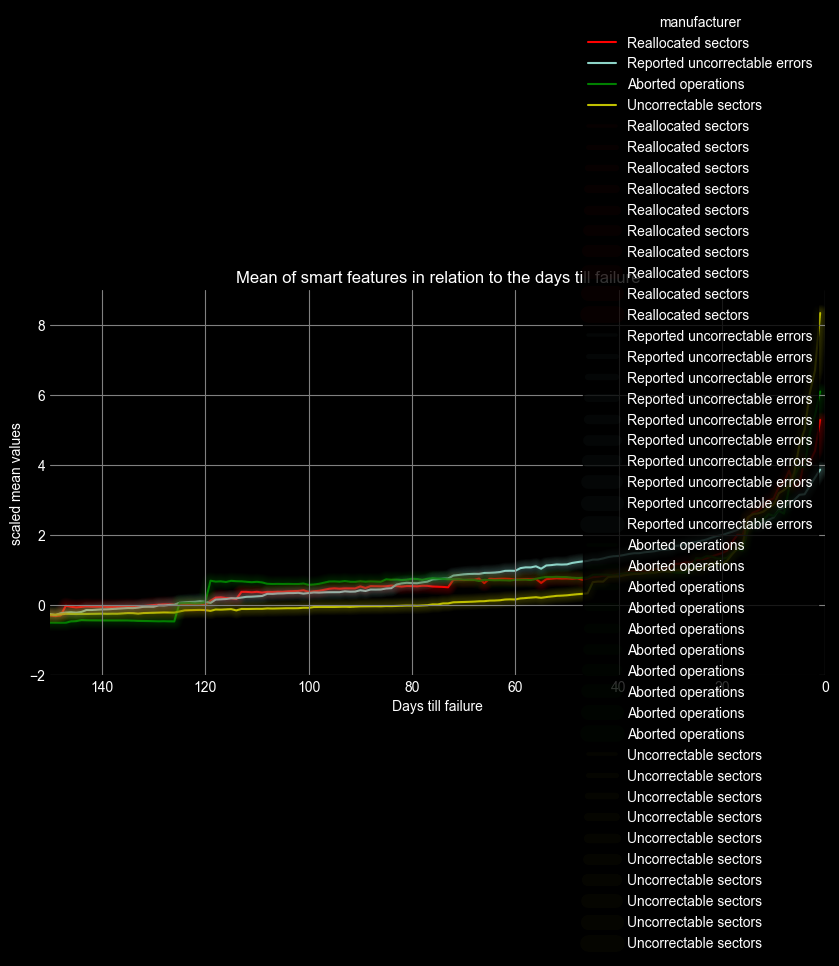

In [155]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(x=df_mean['Time_till_failure'],y=df_mean[0], ax=ax, color='r', label='Reallocated sectors')
sns.lineplot(data=df_mean,x='Time_till_failure',y=1, ax=ax, label='Reported uncorrectable errors')
sns.lineplot(data=df_mean,x='Time_till_failure',y=2, ax=ax, color='g', label='Aborted operations')
sns.lineplot(data=df_mean,x='Time_till_failure',y=4, ax=ax, color='y', label='Uncorrectable sectors')
ax.set_xlim(0,150)
ax.set_ylim(-2,9)
ax.invert_xaxis()
plt.xlabel('Days till failure')
plt.ylabel('scaled mean values')
mplcyberpunk.make_lines_glow()
plt.title('Mean of smart features in relation to the days till failure')
#create legend object
l = ax.legend(frameon=1, facecolor= "black", loc="center right", title="manufacturer")
l.get_frame().set_edgecolor('black')
#ax.grid(False)
ax.grid(color='grey')
plt.rc('axes', axisbelow=False)
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 360 and the vector passed to `y` has length 4.

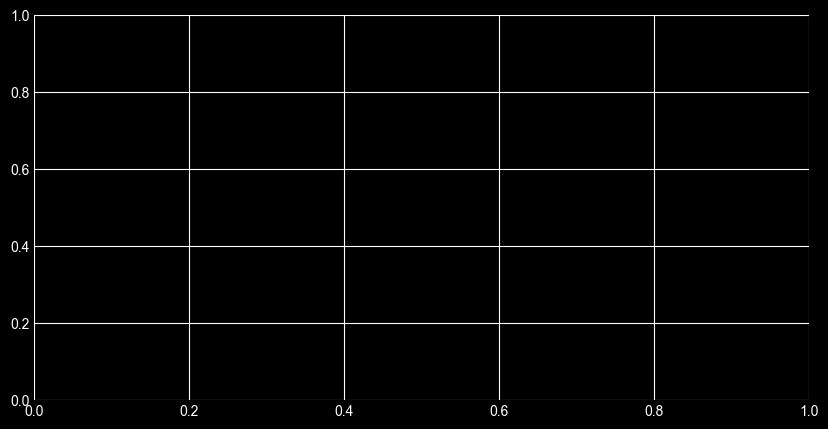

In [148]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (10,5))
sns.lineplot(data=df_mean,x='Time_till_failure',y=[0,1,2,3] ,ax=ax, color='r', label='Reallocated sectors')

In [149]:
a = pd.read_csv('/Users/frederikbruns/neuefische/hard_drive_ML_capstone_project/data/data_Q1_2022/2022-01-01.csv')

In [ ]:
df_mean_normalized.head()

In [ ]:
cols = ['smart_5_normalized', 'smart_187_normalized', 'smart_188_normalized', 'smart_197_normalized', 'smart_198_normalized', 'smart_194_normalized']
df_mean_normalized[cols] = df_mean_normalized[cols].apply(lambda x: np.log(x))

In [ ]:
df_mean_normalized.tail()

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
sns.lineplot(data=df_mean_normalized, ax=ax)
ax.set_xlim(0,360)
ax.set_ylim(3,4.8)
ax.invert_xaxis()
plt.show()